make the graph larger so that all labels are visibly seen

In [ ]:
Make a Python code that visualizes the time alignment of UTC and UTC+8

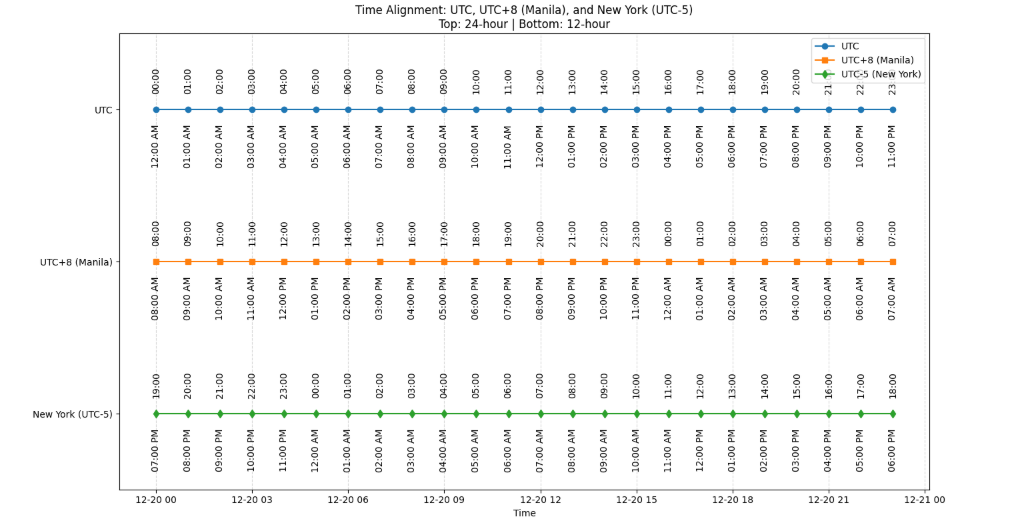
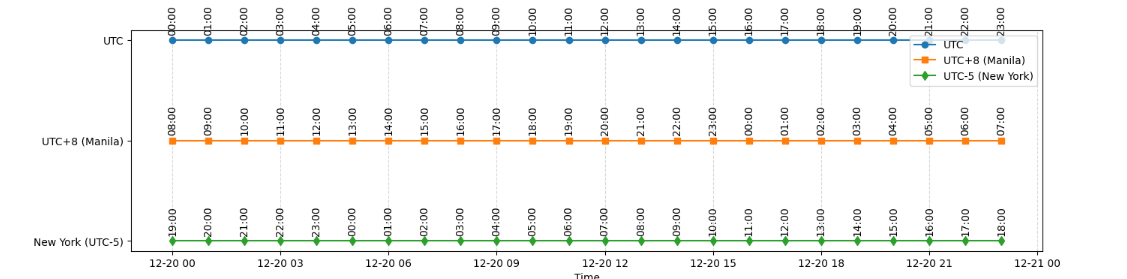

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
import pytz

# Create a 24-hour range for UTC
utc_hours = pd.date_range("2025-12-20 00:00", periods=24, freq="H", tz=pytz.UTC)

# Convert UTC to UTC+8 (Manila) and New York time (UTC-5 / EST)
utc_plus8_hours = utc_hours.tz_convert("Asia/Manila")
ny_hours = utc_hours.tz_convert("America/New_York")

# Define plot boundaries to allow extra space for labels
y_upper = 3.5  # extra space above top labels
y_lower = 0.5  # extra space below bottom labels

plt.figure(figsize=(14, 8))

# Plot the dots
plt.plot(utc_hours, [3]*24, 'o-', label="UTC")
plt.plot(utc_plus8_hours, [2]*24, 's-', label="UTC+8 (Manila)")
plt.plot(ny_hours, [1]*24, 'd-', label="UTC-5 (New York)")

# Add 24-hour (upper) and 12-hour (lower) labels
for u, u8, ny in zip(utc_hours, utc_plus8_hours, ny_hours):
    # 24-hour top labels
    plt.text(u, 3.1, u.strftime("%H:%M"), rotation=90, va='bottom', ha='center')
    plt.text(u8, 2.1, u8.strftime("%H:%M"), rotation=90, va='bottom', ha='center')
    plt.text(ny, 1.1, ny.strftime("%H:%M"), rotation=90, va='bottom', ha='center')

    # 12-hour bottom labels
    plt.text(u, 2.9, u.strftime("%I:%M %p"), rotation=90, va='top', ha='center')
    plt.text(u8, 1.9, u8.strftime("%I:%M %p"), rotation=90, va='top', ha='center')
    plt.text(ny, 0.9, ny.strftime("%I:%M %p"), rotation=90, va='top', ha='center')

# Y-axis and grid
plt.yticks([1, 2, 3], ["New York (UTC-5)", "UTC+8 (Manila)", "UTC"])
plt.ylim(y_lower, y_upper)
plt.title("Time Alignment: UTC, UTC+8 (Manila), and New York (UTC-5)\nTop: 24-hour | Bottom: 12-hour")
plt.xlabel("Time")
plt.grid(True, axis='x', linestyle='--', alpha=0.5)
plt.legend()
plt.tight_layout()
plt.show()
